In [1]:
import pickle
import numpy as np
import xgboost as xgb
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
xy_data_dir = '/Users/mmw/Documents/GitHub/ml_val/data_all/xy_data'
with open(xy_data_dir + '/x_tr.pkl', 'rb') as handle:
    x_tr = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/y_tr.pkl', 'rb') as handle:
    y_tr = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/x_val.pkl', 'rb') as handle:
    x_val = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/y_val.pkl', 'rb') as handle:
    y_val = pickle.load(handle).fillna(0).iloc[:,5:]
# with open(xy_data_dir + '/x_ts.pkl', 'rb') as handle:
#     x_ts = pickle.load(handle).fillna(0).iloc[:,5:]
# with open(xy_data_dir + '/y_ts.pkl', 'rb') as handle:
#     y_ts = pickle.load(handle).fillna(0).iloc[:,5:]
# 

In [3]:
x_tr.columns

Index(['absacc', 'acc', 'agr', 'bm_ia', 'cashdebt', 'cashpr', 'cfp', 'cfp_ia',
       'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind', 'currat',
       'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx',
       'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof',
       'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale',
       'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga',
       'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale',
       'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash',
       'chtx', 'cinvest', 'ear', 'roaq', 'roavol', 'roeq', 'rsup', 'stdacc',
       'stdcf', 'chmom', 'dolvol', 'mom12m', 'mom1m', 'mom36m', 'mom6m',
       'mvel1', 'turn'],
      dtype='object')

In [4]:
list(y_tr.columns)

['revt',
 'ebit',
 'ebitda',
 're',
 'epspi',
 'gp',
 'opiti',
 'act',
 'invt',
 'lct',
 'ch',
 'oancf',
 'dvp',
 'dvc',
 'prstkc',
 'ni',
 'csho',
 'prcc_f',
 'mkvalt',
 'bkvlps',
 'at',
 'lt',
 'dvt',
 'icapt',
 'xint',
 'dlcch',
 'dltt',
 'gdwl',
 'gwo',
 'capx',
 'dlc',
 'seq',
 'gma',
 'operprof',
 'quick',
 'currat',
 'cashrrat',
 'cftrr',
 'dpr',
 'pe',
 'pb',
 'roe',
 'roa',
 'roic',
 'cod',
 'capint',
 'lev',
 'revt_yoy',
 'ebit_yoy',
 'ebitda_yoy',
 're_yoy',
 'epspi_yoy',
 'gp_yoy',
 'opiti_yoy',
 'act_yoy',
 'invt_yoy',
 'lct_yoy',
 'ch_yoy',
 'oancf_yoy',
 'dvp_yoy',
 'dvc_yoy',
 'prstkc_yoy',
 'ni_yoy',
 'csho_yoy',
 'prcc_f_yoy',
 'mkvalt_yoy',
 'bkvlps_yoy',
 'at_yoy',
 'lt_yoy',
 'dvt_yoy',
 'icapt_yoy',
 'xint_yoy',
 'dlcch_yoy',
 'dltt_yoy',
 'gdwl_yoy',
 'gwo_yoy',
 'capx_yoy',
 'dlc_yoy',
 'seq_yoy',
 'gma_yoy',
 'operprof_yoy',
 'quick_yoy',
 'currat_yoy',
 'cashrrat_yoy',
 'cftrr_yoy',
 'dpr_yoy',
 'pe_yoy',
 'pb_yoy',
 'roe_yoy',
 'roa_yoy',
 'roic_yoy',
 'cod_y

[22:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


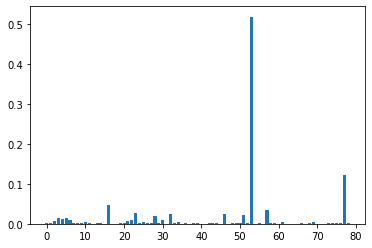

revt 0.8832622870985943
[22:12:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


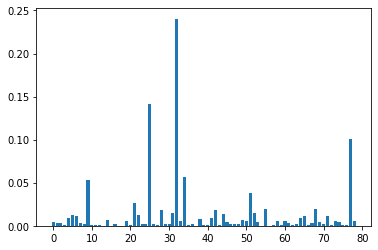

ebit 0.7210372399642123
[22:13:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


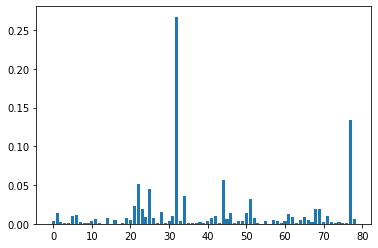

ebitda 0.8564779894997357
[22:13:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


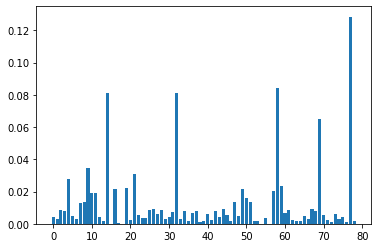

re 0.7951351229702617
[22:13:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


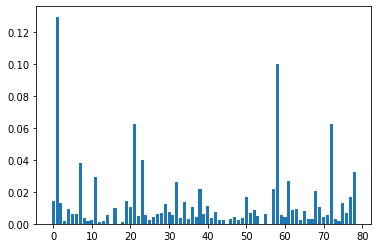

epspi 0.2728168444958219
[22:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


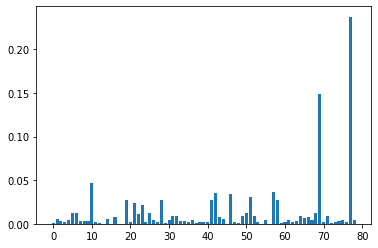

gp 0.8965271175447336
[22:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


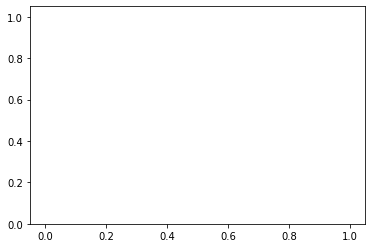

opiti 0.0
[22:14:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


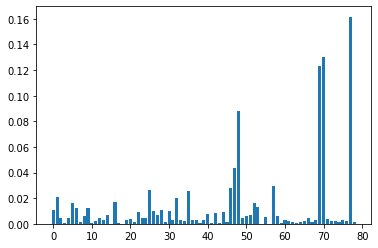

act 0.8051351259300858
[22:14:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


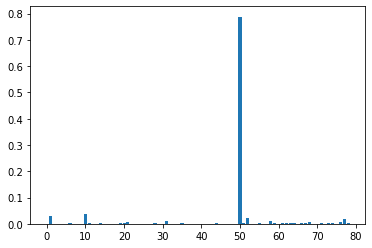

invt 0.6352980252065
[22:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


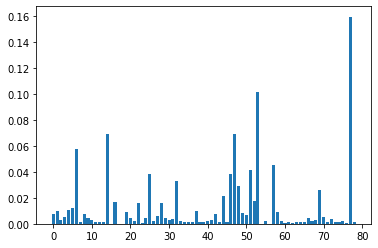

lct 0.8143983976241235
[22:15:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


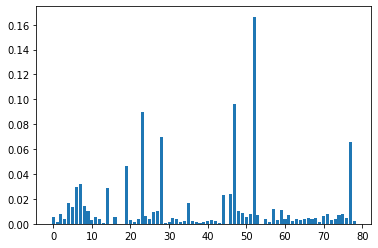

ch 0.4969820017088089
[22:15:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


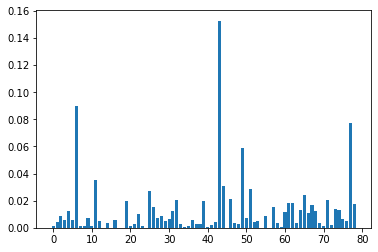

oancf 0.8259311111905089
[22:15:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


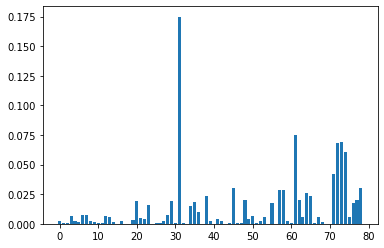

dvp 0.00488454928930715
[22:15:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


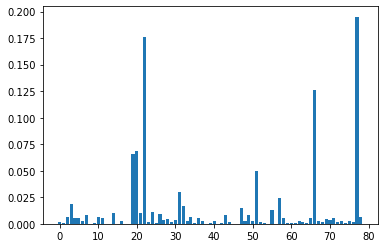

dvc 0.859715496528794
[22:16:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


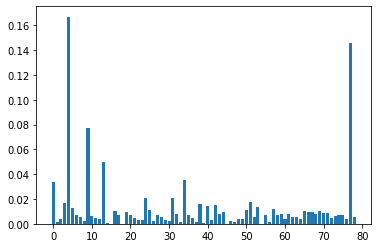

prstkc 0.5324200533593914
[22:16:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


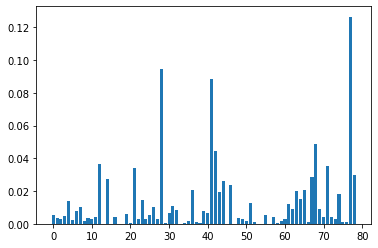

ni 0.834903242599471
[22:16:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


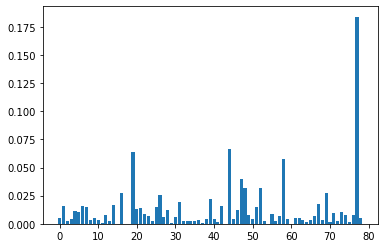

csho 0.6605859324100338
[22:16:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


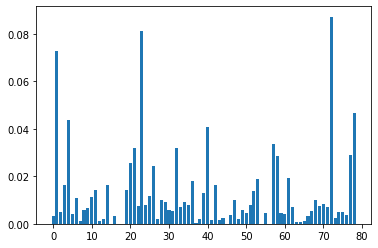

prcc_f 0.41891809400761937
[22:17:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


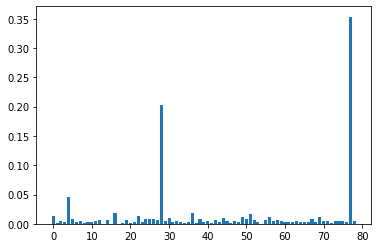

mkvalt 0.909850614486176
[22:17:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


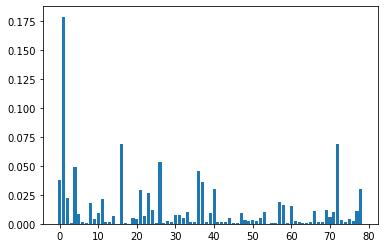

bkvlps 0.44708712078764434
[22:17:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


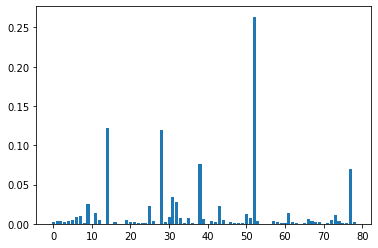

at 0.8712257660496696
[22:18:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


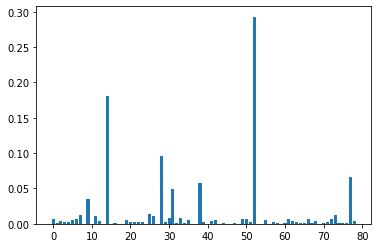

lt 0.806563004084518
[22:18:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


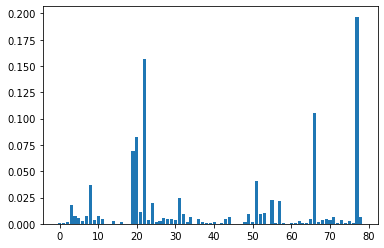

dvt 0.8754820660284819
[22:18:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


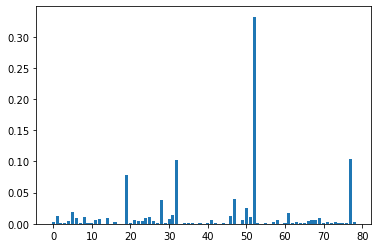

icapt 0.8721437343313666
[22:18:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


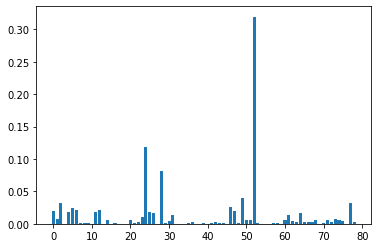

xint -0.3513484578025363
[22:19:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


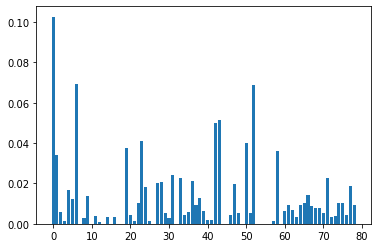

dlcch 0.04540180433097041
[22:19:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


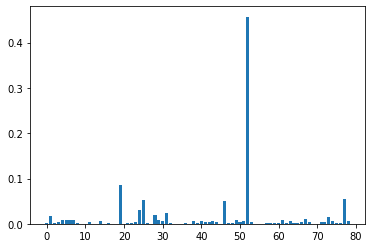

dltt 0.897187395646212
[22:19:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


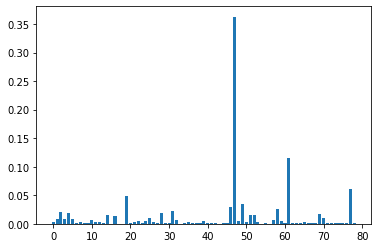

gdwl 0.7850039211714054
[22:19:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


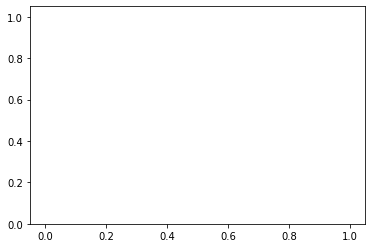

gwo 0.0
[22:20:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


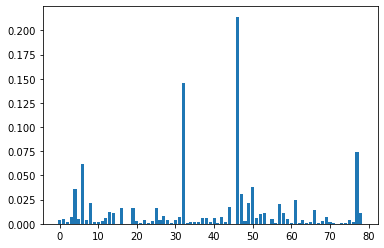

capx 0.7668600412541476
[22:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


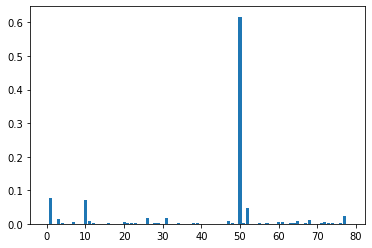

dlc 0.6226293020266371
[22:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


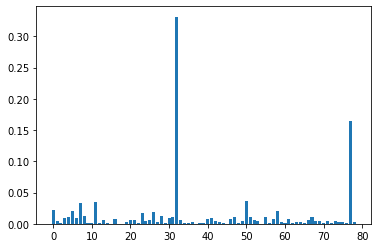

seq 0.8157661729399452
[22:20:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


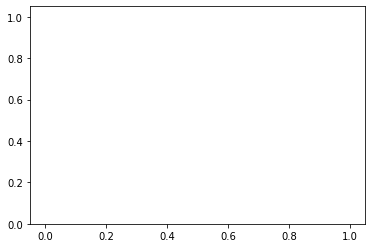

gma -0.0020528635182170962
[22:20:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


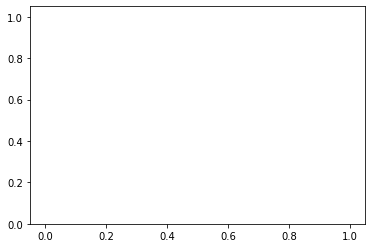

operprof 0.0
[22:21:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


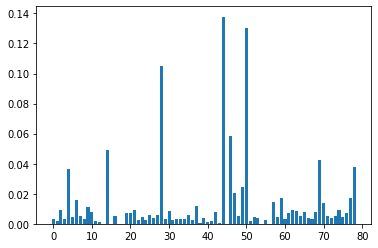

quick 0.02933485292973581
[22:21:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


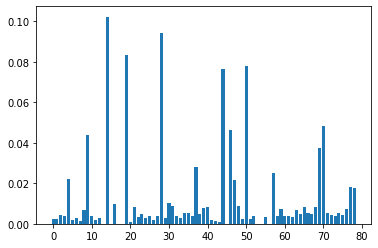

currat 0.02679366911065728
[22:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


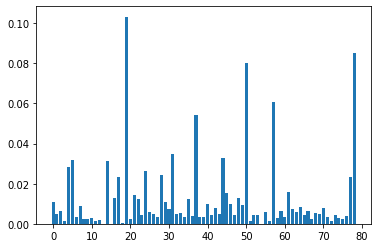

cashrrat 0.5430423342181074
[22:21:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


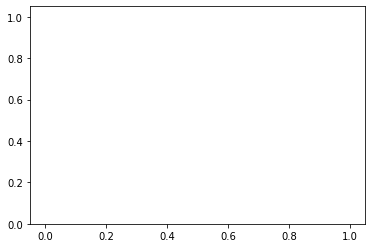

cftrr -0.0023169116240684406
[22:21:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


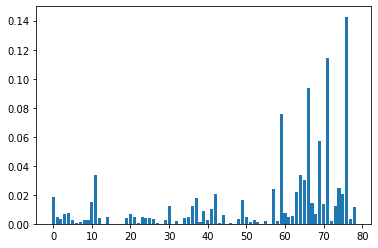

dpr -0.06916901597620329
[22:22:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


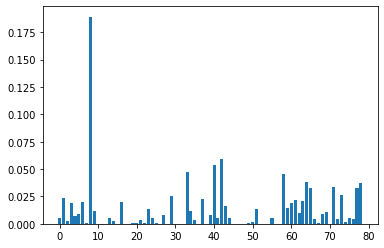

pe -0.18155772453442665
[22:22:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


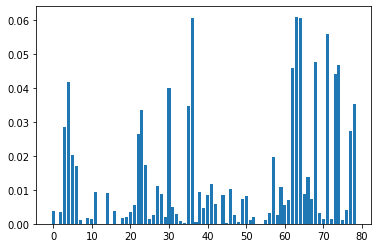

pb -0.001413469629451214
[22:22:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


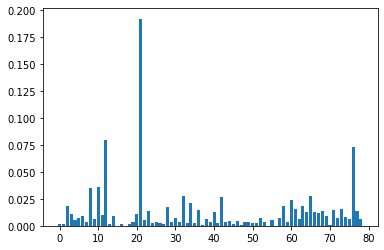

roe 0.06114039837985652
[22:23:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


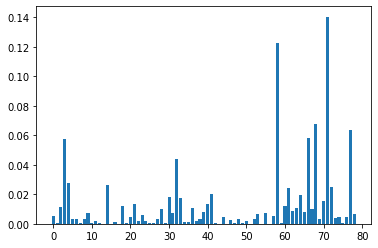

roa -0.24561955123700896
[22:23:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


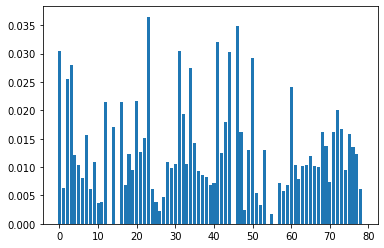

roic 0.006711247895863859
[22:23:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


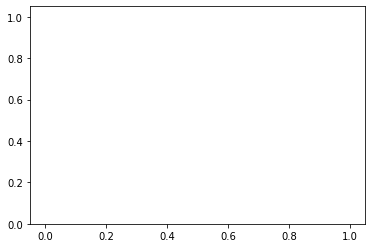

cod -0.1161896175197521
[22:23:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


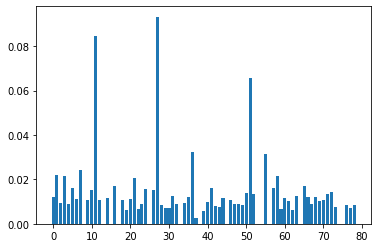

capint 0.5866468327888873
[22:24:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


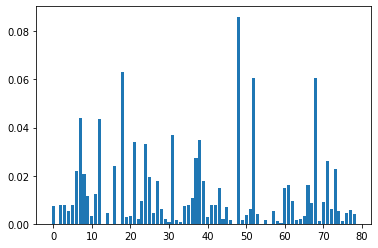

lev -0.02424373412068448
[22:24:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


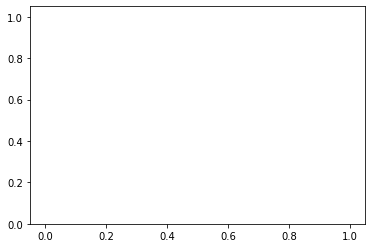

Cannot do revt_yoy!
[22:24:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


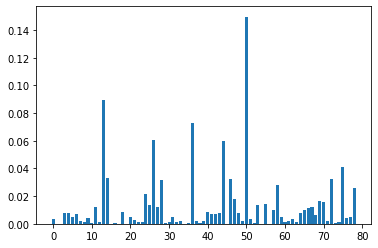

ebit_yoy -0.45360075556836477
[22:24:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


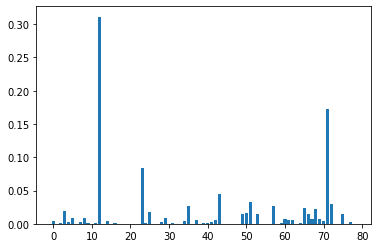

ebitda_yoy -0.33039427967080526
[22:24:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


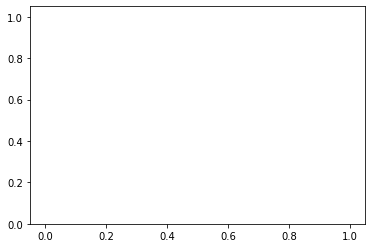

re_yoy -0.0006374815470508999
[22:24:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


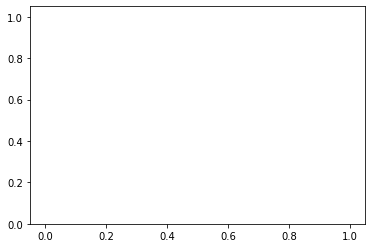

epspi_yoy -0.0008138739915672932
[22:25:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


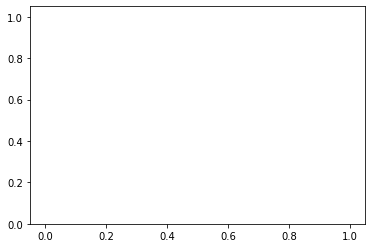

gp_yoy -0.0019586645385818446
[22:25:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


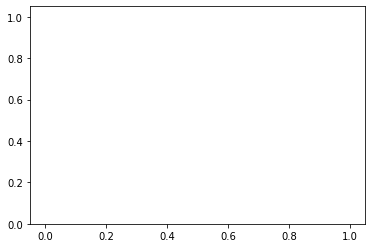

opiti_yoy 0.0
[22:25:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


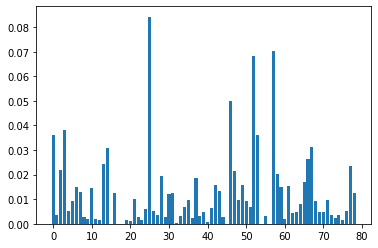

act_yoy -0.001366490315716673
[22:25:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


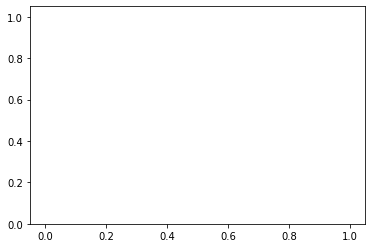

Cannot do invt_yoy!
[22:25:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


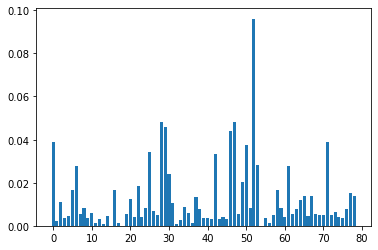

lct_yoy 0.00995984751749146
[22:25:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


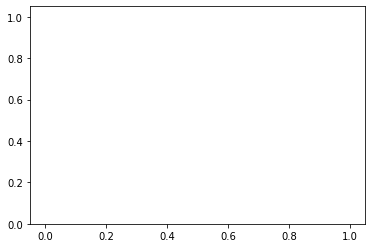

Cannot do ch_yoy!
[22:25:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


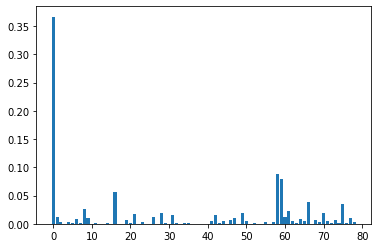

oancf_yoy -0.05977904568429859
[22:26:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


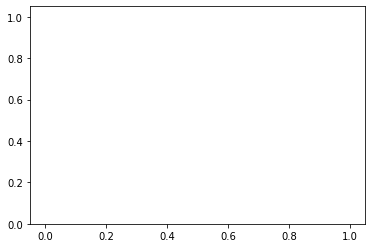

dvp_yoy -0.001128788230148281
[22:26:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


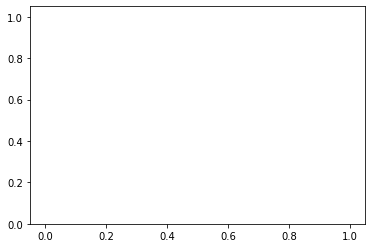

Cannot do dvc_yoy!
[22:26:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


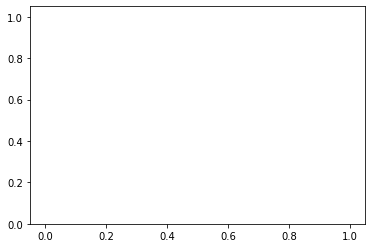

Cannot do prstkc_yoy!
[22:26:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


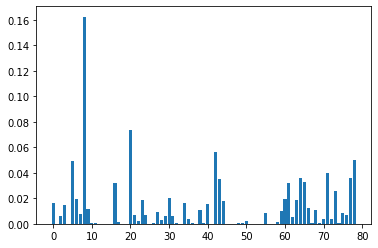

ni_yoy -0.2334977717607971
[22:26:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


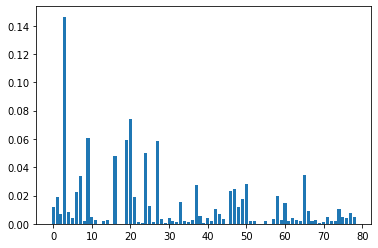

csho_yoy -0.0512802027205852
[22:26:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


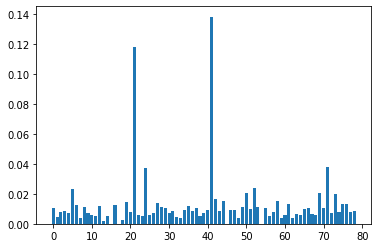

prcc_f_yoy -0.09263833746905226
[22:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


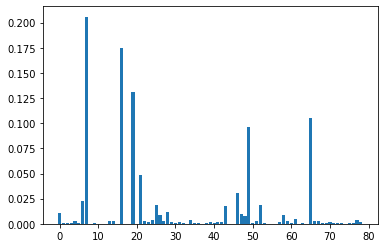

mkvalt_yoy -53.717963749561775
[22:27:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


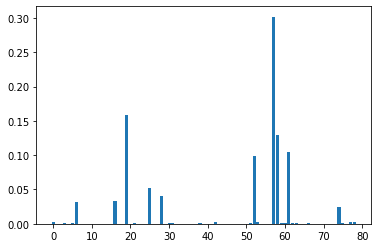

bkvlps_yoy -13.568065309584725
[22:27:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


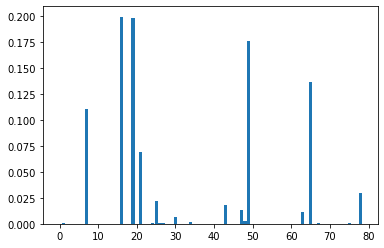

at_yoy -32.20459869770021
[22:28:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


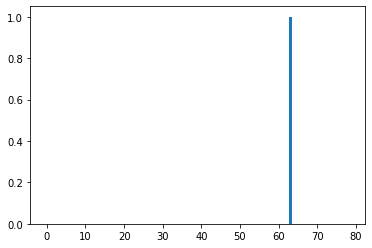

lt_yoy -0.0032486834341076687
[22:28:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


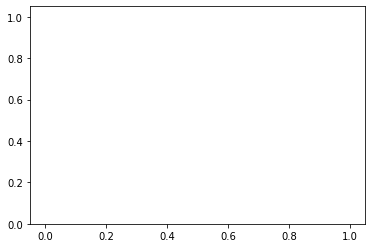

Cannot do dvt_yoy!
[22:28:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


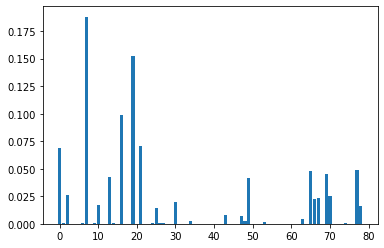

icapt_yoy -24.330515950724383
[22:28:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


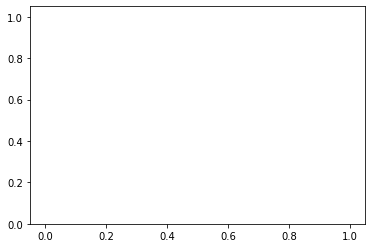

xint_yoy -0.0027110142260851067
[22:28:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


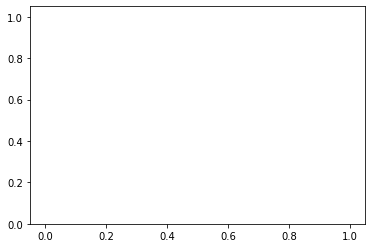

dlcch_yoy -2.9227815362187215e-05
[22:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


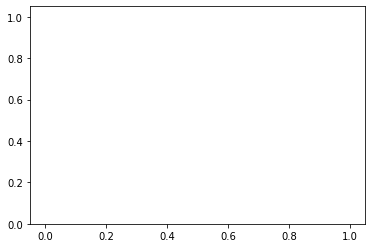

Cannot do dltt_yoy!
[22:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


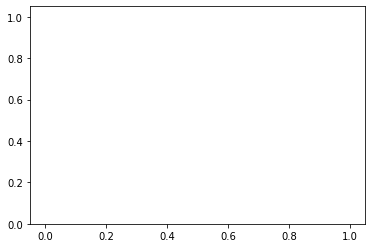

Cannot do gdwl_yoy!
[22:29:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


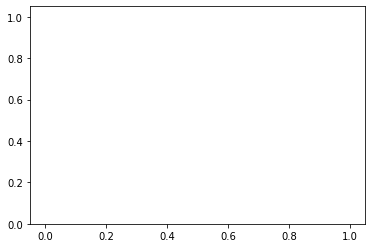

gwo_yoy 0.0
[22:29:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


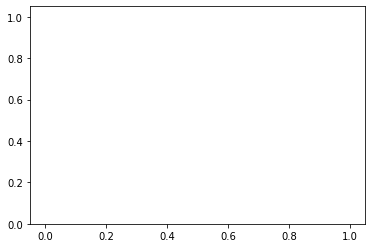

Cannot do capx_yoy!
[22:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


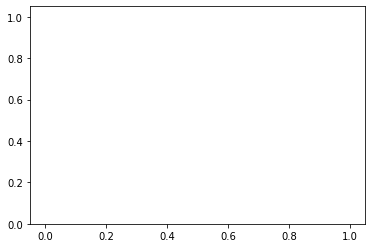

Cannot do dlc_yoy!
[22:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


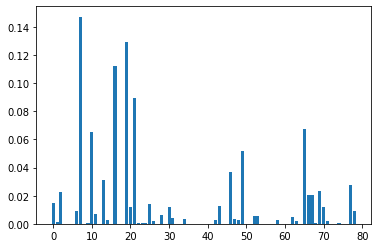

seq_yoy -0.6504675282899706
[22:29:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


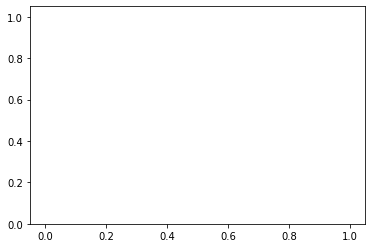

gma_yoy -0.00024433547613411655
[22:29:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


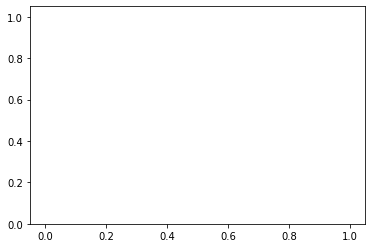

operprof_yoy 0.0
[22:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


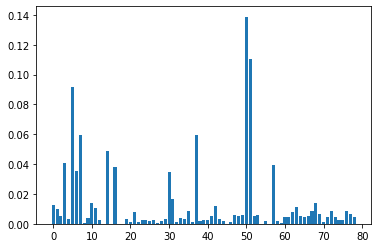

quick_yoy 0.29827451182174614
[22:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


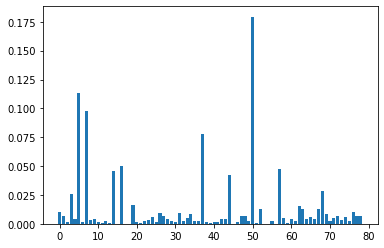

currat_yoy 0.2730134797219449
[22:30:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


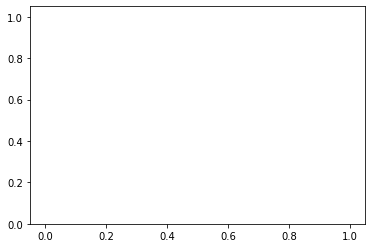

Cannot do cashrrat_yoy!
[22:30:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


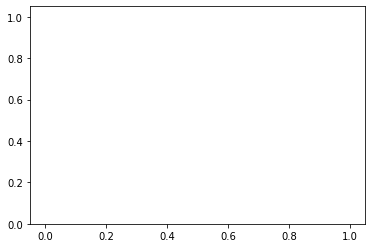

cftrr_yoy -2.7212688495703574e-05
[22:30:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


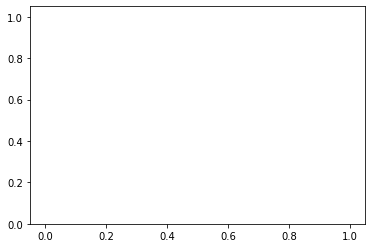

dpr_yoy -1.9257915748749355e-06
[22:30:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


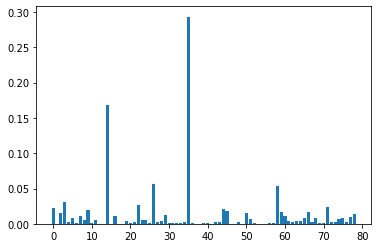

pe_yoy -1.4823229663681152
[22:30:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


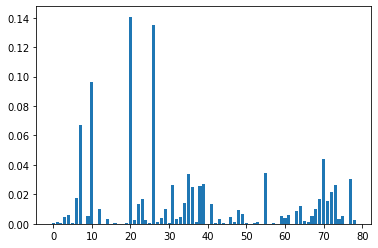

pb_yoy -0.49980064217252806
[22:30:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


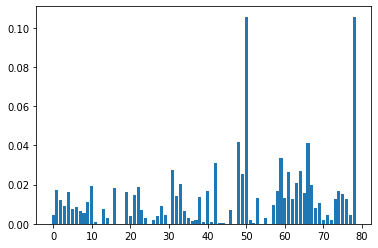

roe_yoy -0.00013667645729720235
[22:31:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


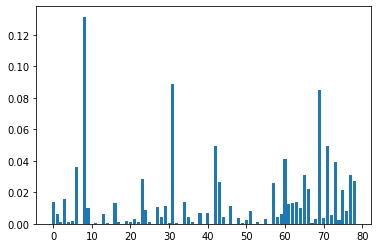

roa_yoy -0.03864298941216071
[22:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


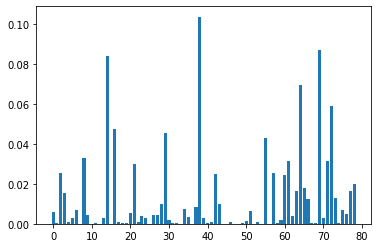

roic_yoy -0.0651383930640892
[22:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


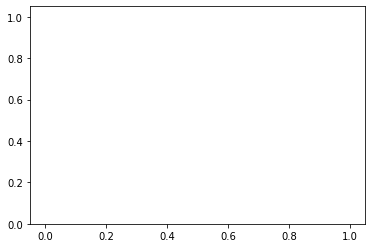

cod_yoy -9.15322522672124e-05
[22:31:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


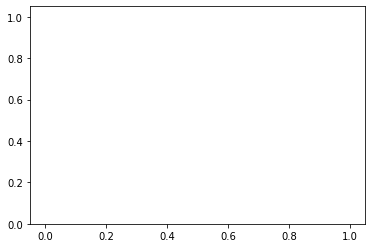

Cannot do capint_yoy!
[22:31:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


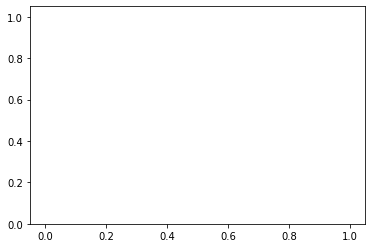

lev_yoy -0.00032366149988494186
[22:31:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


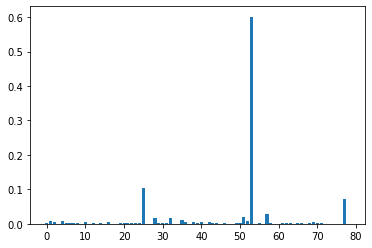

revtq 0.8668355851106186
[22:32:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


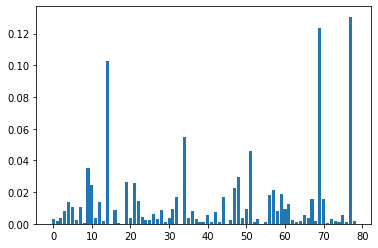

req 0.7887672989118082
[22:32:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


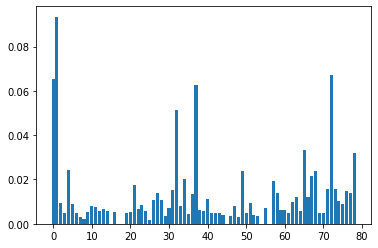

epspiq 0.18940343341243882
[22:32:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


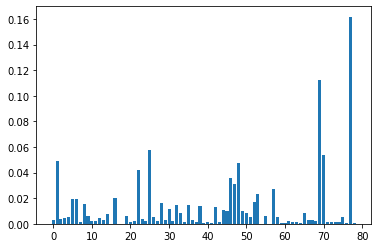

actq 0.8022093330010546
[22:32:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


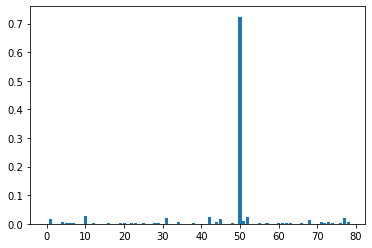

invtq 0.6163067508048237
[22:33:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


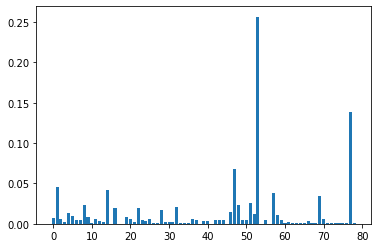

lctq 0.7709988380612318
[22:33:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


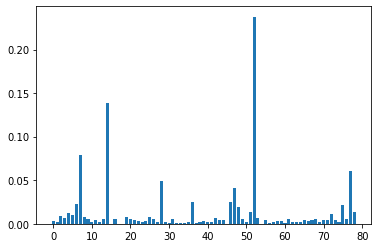

chq 0.5243598567519567
[22:33:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


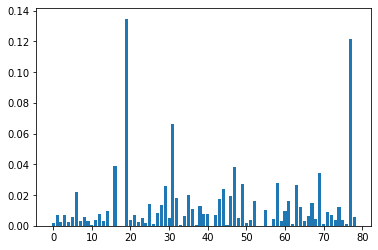

cshoq 0.5247432640700294
[22:33:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


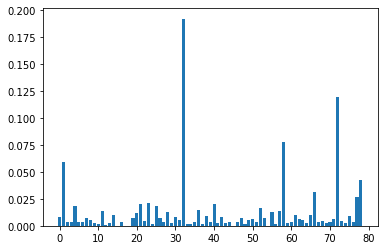

prccq 0.4040340930287516
[22:34:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


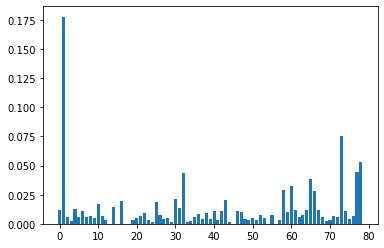

niq 0.40661387104949176
[22:34:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


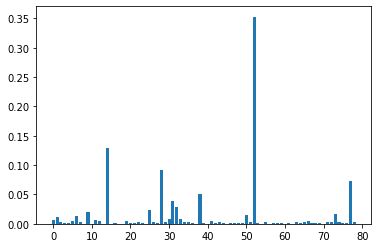

atq 0.8648606868477202
[22:34:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


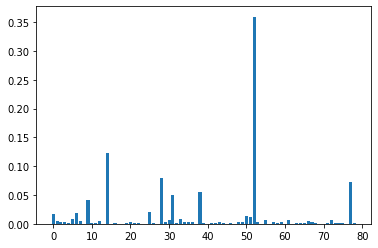

ltq 0.8178040765706058
[22:35:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


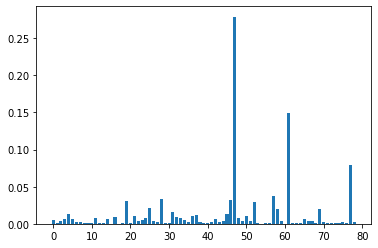

gdwlq 0.7476901308861537
[22:35:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


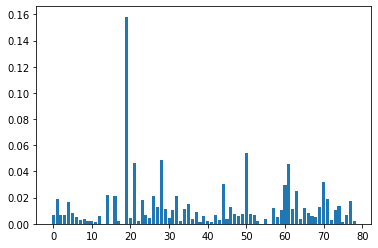

quickq 0.3162892152052913
[22:35:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


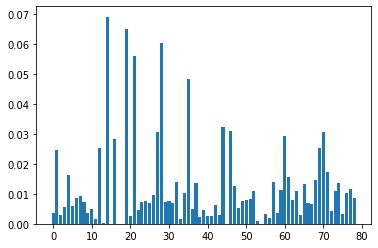

curratq 0.33109060247012356
[22:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


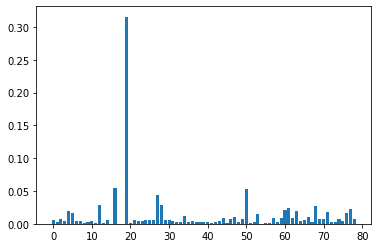

cashrratq 0.24098466496928284
[22:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


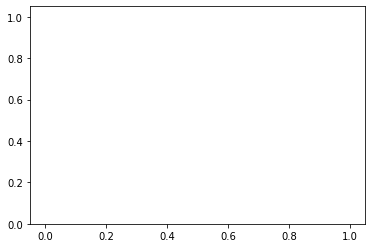

Cannot do peq!
[22:36:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


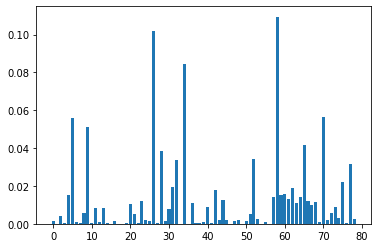

roeq -0.007852568223671419
[22:36:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


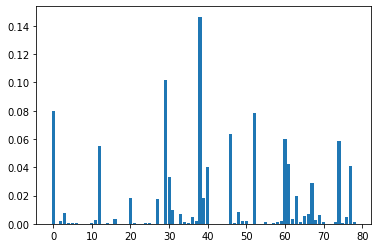

roaq -0.003680037353218202
[22:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


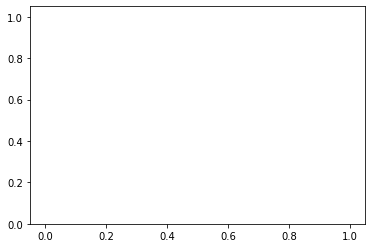

Cannot do revtq_qoq!
[22:36:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


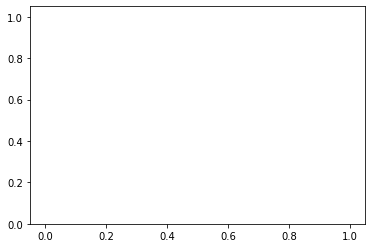

req_qoq -0.013092398036758324
[22:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


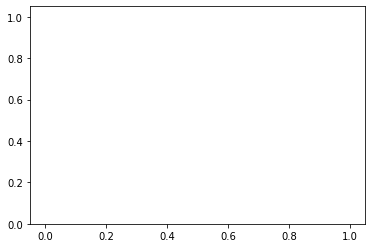

epspiq_qoq -0.002922229509012775
[22:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


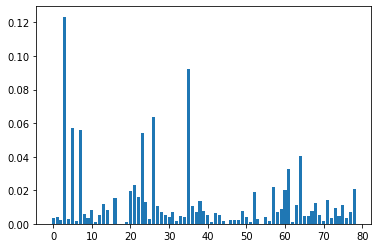

actq_qoq -0.057771707060495725
[22:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


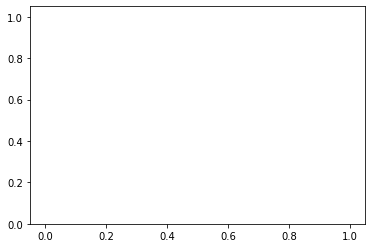

Cannot do invtq_qoq!
[22:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


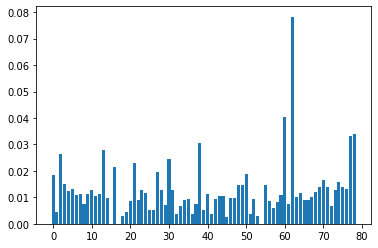

lctq_qoq -0.02241265691946026
[22:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


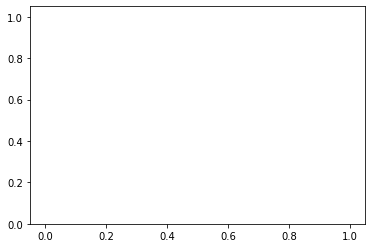

Cannot do chq_qoq!
[22:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


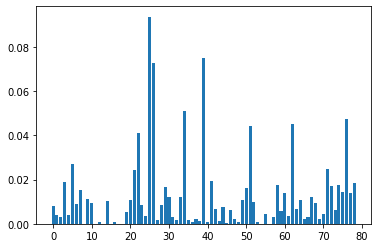

cshoq_qoq -0.0052908914581861755
[22:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


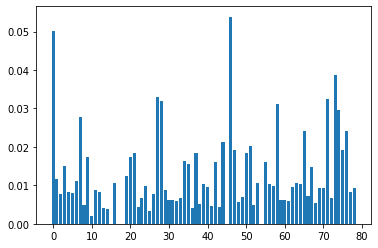

prccq_qoq -0.10494814852875933
[22:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


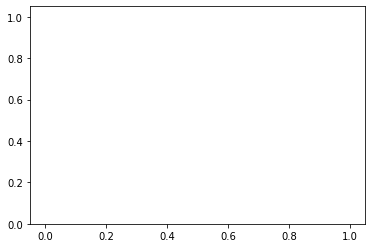

niq_qoq -1.6888815877358354e-05
[22:38:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


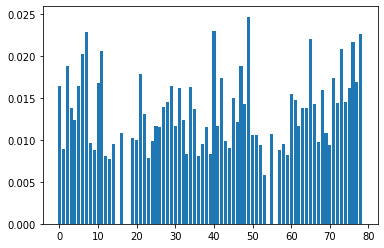

atq_qoq -0.008606995263273243
[22:38:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


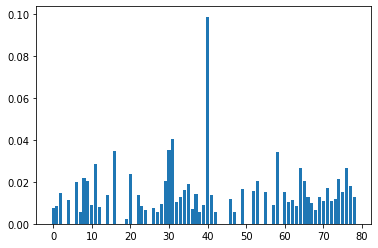

ltq_qoq -0.0003568435878529286
[22:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


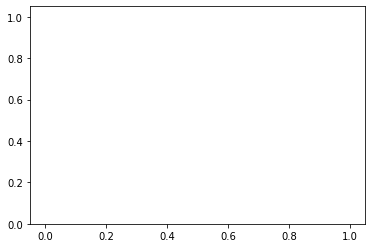

Cannot do gdwlq_qoq!
[22:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


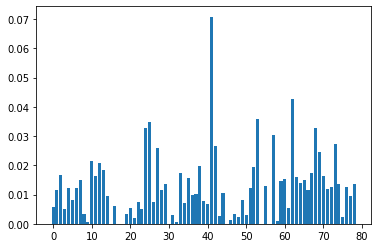

quickq_qoq -0.04120822567997595
[22:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


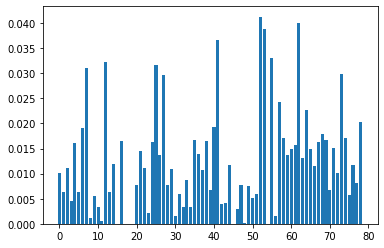

curratq_qoq -0.03596778074242768
[22:39:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


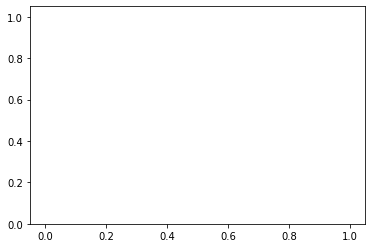

Cannot do cashrratq_qoq!
[22:39:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


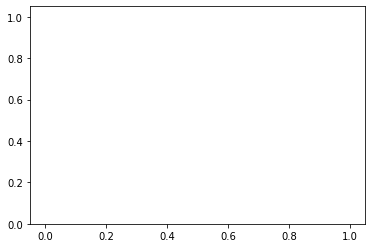

peq_qoq -7.450400651087818e-05
[22:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


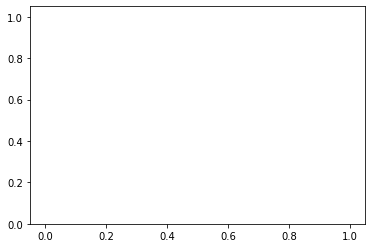

roeq_qoq -2.375269462828733e-05
[22:39:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


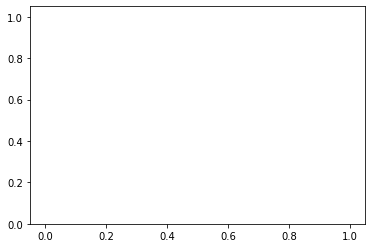

roaq_qoq -3.3633253424758536e-05
[22:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


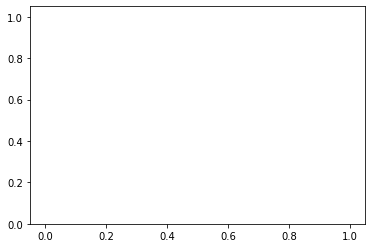

Cannot do revtq_aoa!
[22:39:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


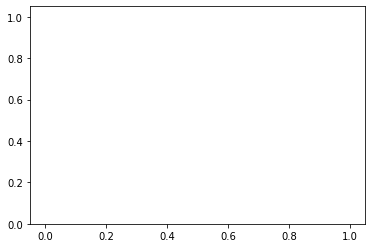

Cannot do req_aoa!
[22:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


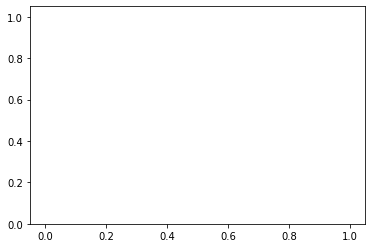

epspiq_aoa -0.002134724719499159
[22:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


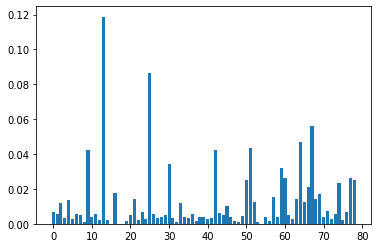

actq_aoa -0.47949219747643657
[22:39:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


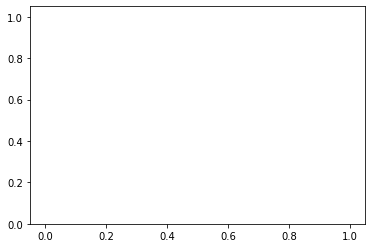

Cannot do invtq_aoa!
[22:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


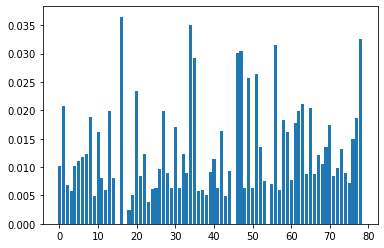

lctq_aoa 0.024831130319266648
[22:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


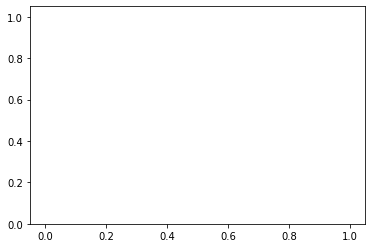

Cannot do chq_aoa!
[22:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


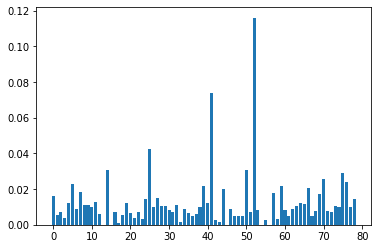

cshoq_aoa -0.007431293264090977
[22:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


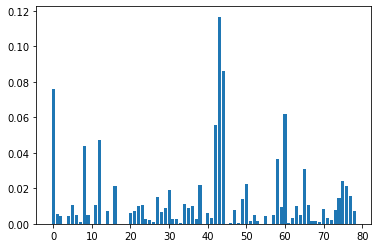

prccq_aoa -0.09511347767544143
[22:40:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


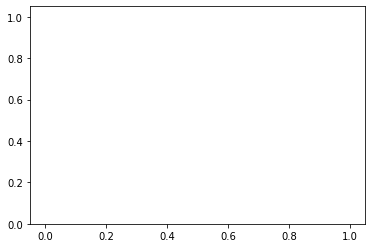

niq_aoa -8.065332988138607e-07
[22:40:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


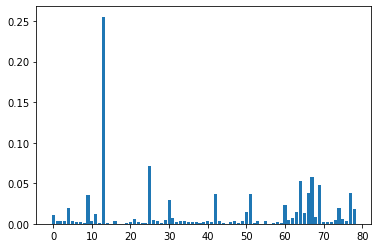

atq_aoa -0.381373712312296
[22:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


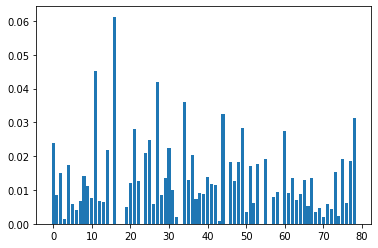

ltq_aoa 0.0002424201277967386
[22:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


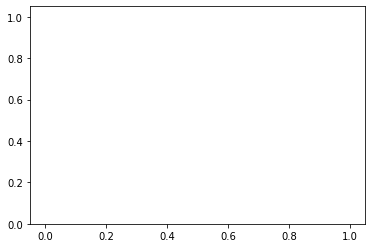

Cannot do gdwlq_aoa!
[22:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


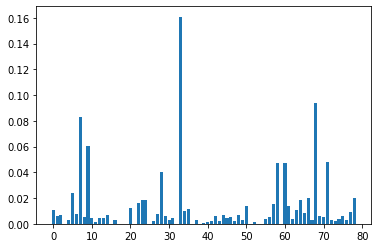

quickq_aoa -0.041757401228058155
[22:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


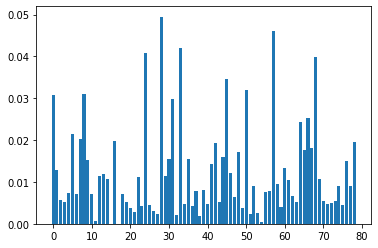

curratq_aoa 0.006833714665699597
[22:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


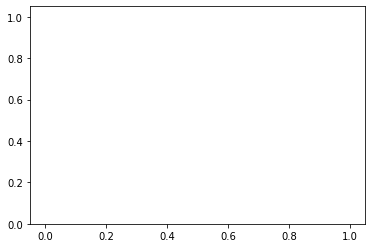

Cannot do cashrratq_aoa!
[22:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


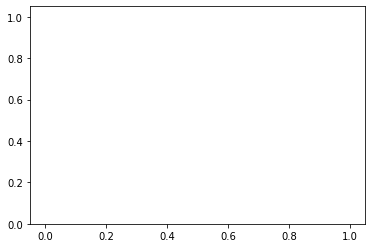

peq_aoa -2.3265181102960497e-05
[22:42:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


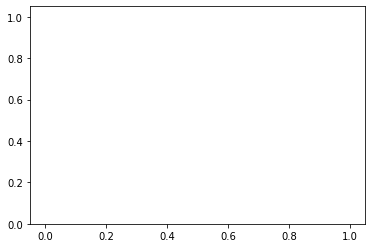

roeq_aoa -2.3969823112368616e-05
[22:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


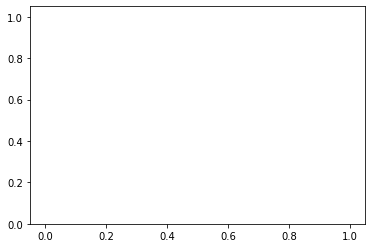

roaq_aoa -5.583878674997322e-07


In [5]:
mod = xgb.XGBRegressor(
    max_depth=6,
    n_estimators=100, 
    min_child_weight=5,
    gamma=0.1,
    learning_rate=0.1
) 

oosr2 = {}
for item in y_tr.columns:
    try:
        mod.fit(x_tr.values, y_tr[item].values)
        predictions = mod.predict(x_val.values)
        y_true = y_val[item].values 
        # plot
        plt.bar(range(len(mod.feature_importances_)), mod.feature_importances_)
        plt.show()
        y_true[y_true==np.inf] = 0
        y_true[y_true==np.NINF] = 0
        y_true[y_true==np.NaN] = 0
        oosr2[item] = sklearn.metrics.r2_score(y_true, predictions)
        print(item, sklearn.metrics.r2_score(y_true, predictions))
    except:
        print(f'Cannot do {item}!')

In [ ]:
import pickle
with open('/Users/mingyu/Desktop/data/month_x/x_V.pkl' ,'rb') as handle: 
    content = pickle.load(handle)
content.loc[[(10530, 2009, 9)], :]

In [ ]:

with open('/Users/mingyu/Desktop/data/month_x/x_S.pkl', 'rb') as handle: 
    content = pickle.load(handle)

In [ ]:
content

,,,fyearq,fqtr,apdedateq,datadate,pdateq,fdateq,gvkey_x,datadate_q,rdq_x,chtx,...,mom12m,mom36m,mom1m,dolvol,chmom,turn,retcons_pos,moms12m,x_1,dpqq
permno,year,month,,,,,,,,,,,,,,,,,,,,,
10530.0,2009,9,2009.0,2.0,2009-03-31,2009-03-31,2009-04-16,2009-05-22,012433,2009-03-31,2009-04-16,0.000185,...,0.296715,0.412945,0.092938,1.194376,1.665898,1.875756,0,0.053909,0.010721,0.007632


In [29]:

with open('/Users/mingyu/Desktop/data/month_x/x_S.pkl', 'rb') as handle: 
    content = pickle.load(handle)

In [30]:
content

fyearq  fqtr  apdedateq   datadate     pdateq     fdateq  \
permno  year month                                                             
10259.0 1988 1      1987.0   2.0        NaT 1987-07-31        NaT        NaT   
             2      1987.0   2.0        NaT 1987-07-31        NaT        NaT   
             3      1987.0   2.0        NaT 1987-07-31        NaT        NaT   
             4      1987.0   3.0        NaT 1987-10-31        NaT        NaT   
             5      1987.0   3.0        NaT 1987-10-31        NaT        NaT   
             6      1987.0   3.0        NaT 1987-10-31        NaT        NaT   
             7      1987.0   3.0        NaT 1987-10-31        NaT        NaT   
             8      1987.0   4.0        NaT 1988-01-31        NaT        NaT   
             9      1987.0   4.0        NaT 1988-01-31        NaT        NaT   
             10     1988.0   1.0        NaT 1988-04-30        NaT        NaT   
             11     1988.0   1.0        NaT 1988-04-30        NaT        NaT   
        1989 1      1988.0   2.0        NaT 1988-07-31        NaT        NaT   
             3      1988.0   2.0        NaT 1988-07-31        NaT        NaT   
             4      1988.0   3.0        NaT 1988-10-31        NaT        NaT   
             5      1988.0   3.0        NaT 1988-10-31        NaT        NaT   
             7      1988.0   3.0        NaT 1988-10-31        NaT        NaT   
             8      1988.0   4.0        NaT 1989-01-31        NaT        NaT   
             10     1989.0   1.0        NaT 1989-04-30        NaT        NaT   
             12     1989.0   1.0        NaT 1989-04-30        NaT        NaT   
        1990 1      1989.0   2.0        NaT 1989-07-31        NaT        NaT   
             4      1989.0   3.0        NaT 1989-10-31        NaT        NaT   
             5      1989.0   3.0        NaT 1989-10-31        NaT        NaT   
             6      1989.0   3.0        NaT 1989-10-31        NaT        NaT   
             7      1989.0   3.0        NaT 1989-10-31        NaT        NaT   
             8      1989.0   4.0        NaT 1990-01-31        NaT        NaT   
             10     1990.0   1.0        NaT 1990-04-30        NaT        NaT   
        1991 1      1990.0   2.0        NaT 1990-07-31        NaT        NaT   
             4      1990.0   3.0        NaT 1990-10-31        NaT        NaT   
             5      1990.0   3.0        NaT 1990-10-31        NaT        NaT   
             7      1990.0   3.0        NaT 1990-10-31        NaT        NaT   
...                    ...   ...        ...        ...        ...        ...   
93434.0 2017 3      2016.0   4.0 2016-06-30 2016-06-30 2016-09-17 2016-09-23   
             4      2017.0   1.0 2016-09-30 2016-09-30 2016-11-15 2016-11-30   
             5      2017.0   1.0 2016-09-30 2016-09-30 2016-11-15 2016-11-30   
             6      2017.0   1.0 2016-09-30 2016-09-30 2016-11-15 2016-11-30   
             7      2017.0   2.0 2016-12-31 2016-12-31 2017-02-12 2017-02-20   
             8      2017.0   2.0 2016-12-31 2016-12-31 2017-02-12 2017-02-20   
             9      2017.0   2.0 2016-12-31 2016-12-31 2017-02-12 2017-02-20   
             11     2017.0   3.0 2017-03-31 2017-03-31 2017-05-19 2017-06-05   
             12     2017.0   3.0 2017-03-31 2017-03-31 2017-05-19 2017-06-05   
        2018 2      2017.0   4.0 2017-06-30 2017-06-30 2017-09-15 2017-09-25   
             3      2017.0   4.0 2017-06-30 2017-06-30 2017-09-15 2017-09-25   
             4      2018.0   1.0 2017-09-30 2017-09-30 2017-11-14 2017-12-01   
             5      2018.0   1.0 2017-09-30 2017-09-30 2017-11-14 2017-12-01   
             6      2018.0   1.0 2017-09-30 2017-09-30 2017-11-14 2017-12-01   
             7      2018.0   2.0 2017-12-31 2017-12-31 2018-02-12 2018-04-02   
             8      2018.0   2.0 2017-12-31 2017-12-31 2018-02-12 2018-04-02   
             9      2018.0   2.0 2017-12-31 2017-12-31 2018-02-12 2018-04-02   
             10     